# Body Fat Predictor

This project estimates the percentage of body fat in a human's body based on parameters such as weight, height, hip size and many more. 

## Data Set

Lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.

The features contained in the dataset;

1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)


**Source**

The dataset is gotten from [kaggle](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

The data were generously supplied by Dr. A. Garth Fisher who gave permission to freely distribute the data and use for non-commercial purposes.

Roger W. Johnson
Department of Mathematics & Computer Science
South Dakota School of Mines & Technology
501 East St. Joseph Street
Rapid City, SD 57701

- email address: rwjohnso@silver.sdsmt.edu
- web address: http://silver.sdsmt.edu/~rwjohnso

In [1]:
# Import dependancies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv("body_fat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Exploratory Data Analysis

In [3]:
df.shape

(252, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


### KDE Distribution Plots
When given numerical variables, it is important find the distribution of the variables.

Below we will define a function that plots the distribution of each numerical feature against the target column (`bodyFat`)

Distribution plots for Density feature is shown below


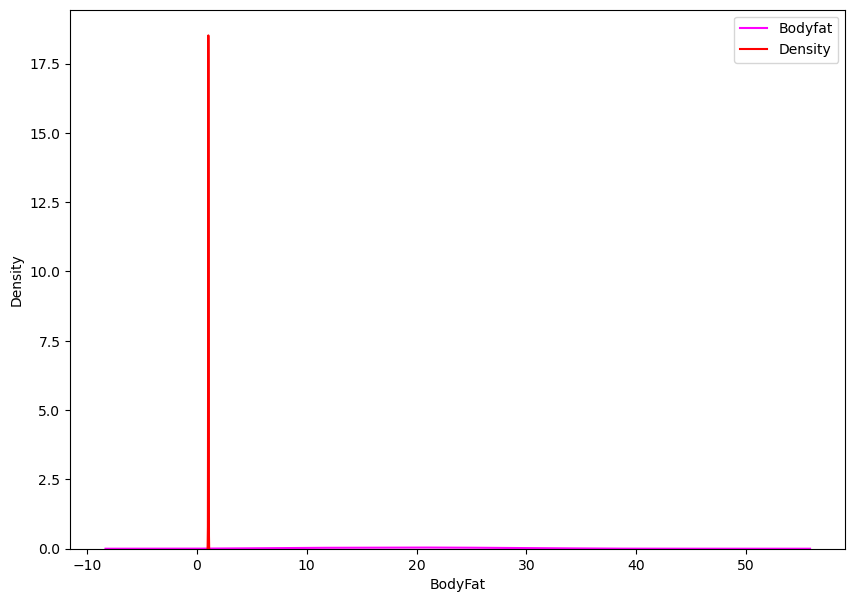

....................................................................................................
Distribution plots for BodyFat feature is shown below


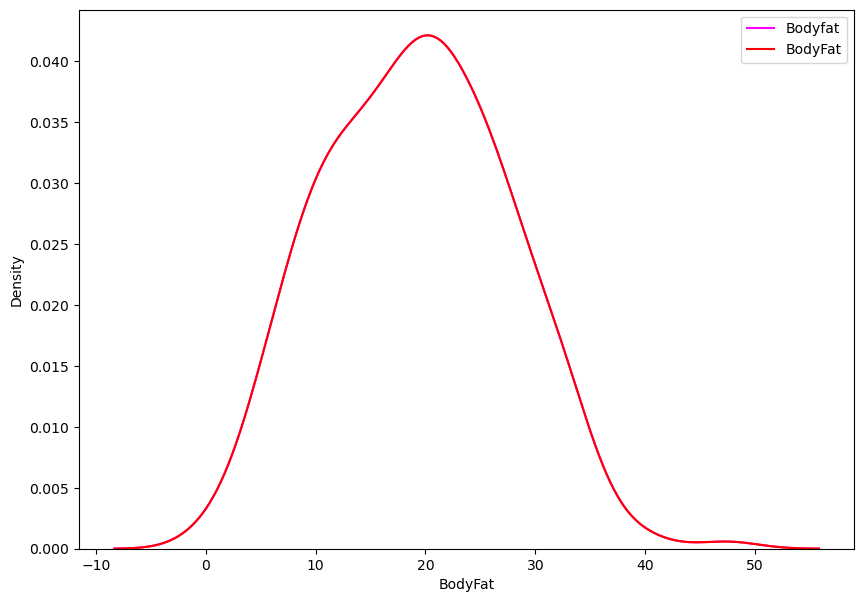

....................................................................................................
Distribution plots for Age feature is shown below


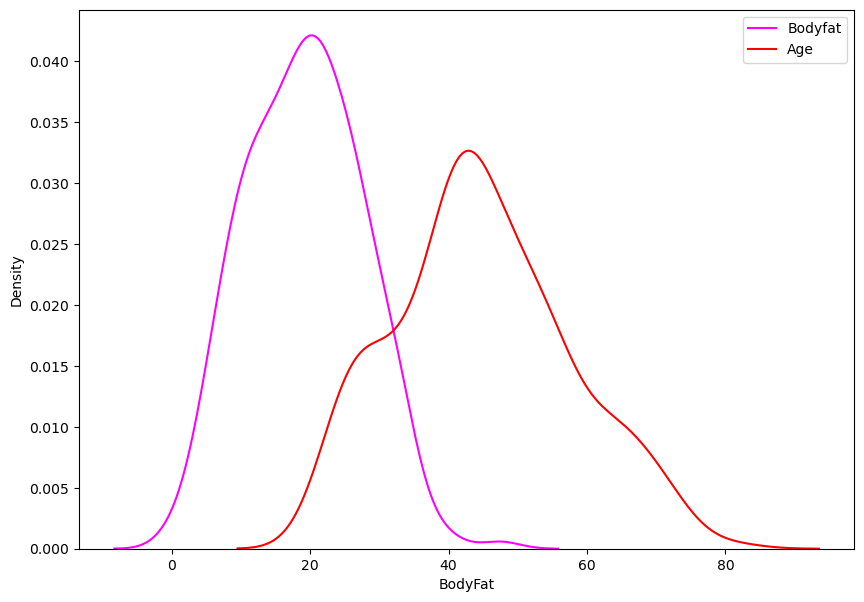

....................................................................................................
Distribution plots for Weight feature is shown below


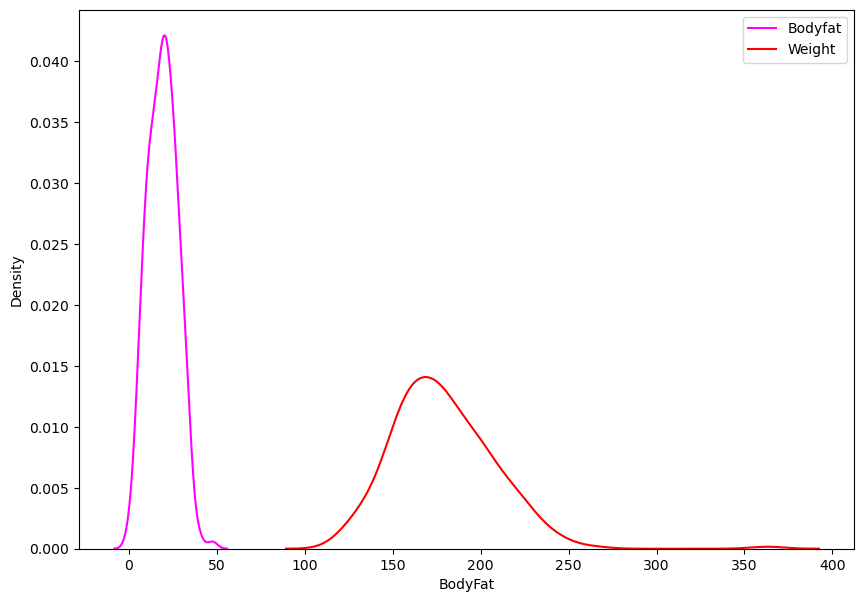

....................................................................................................
Distribution plots for Height feature is shown below


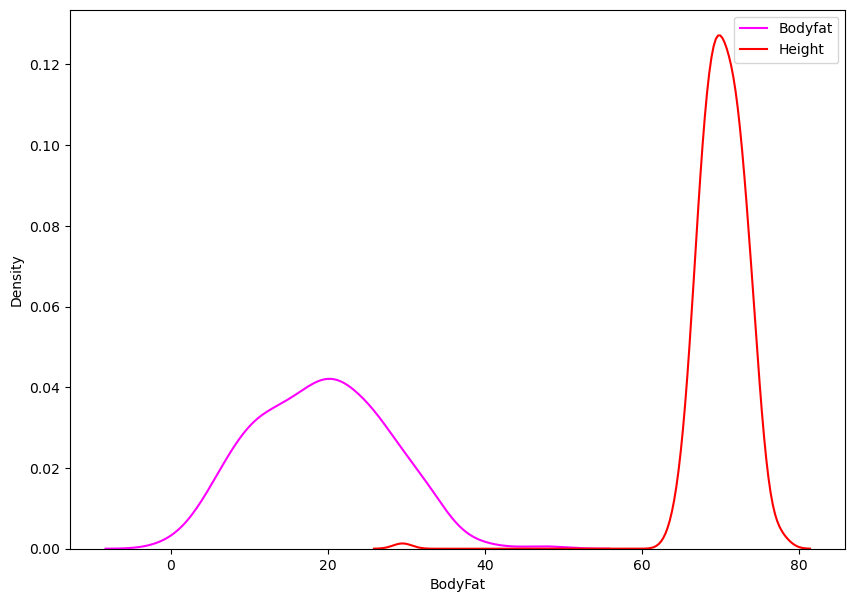

....................................................................................................
Distribution plots for Neck feature is shown below


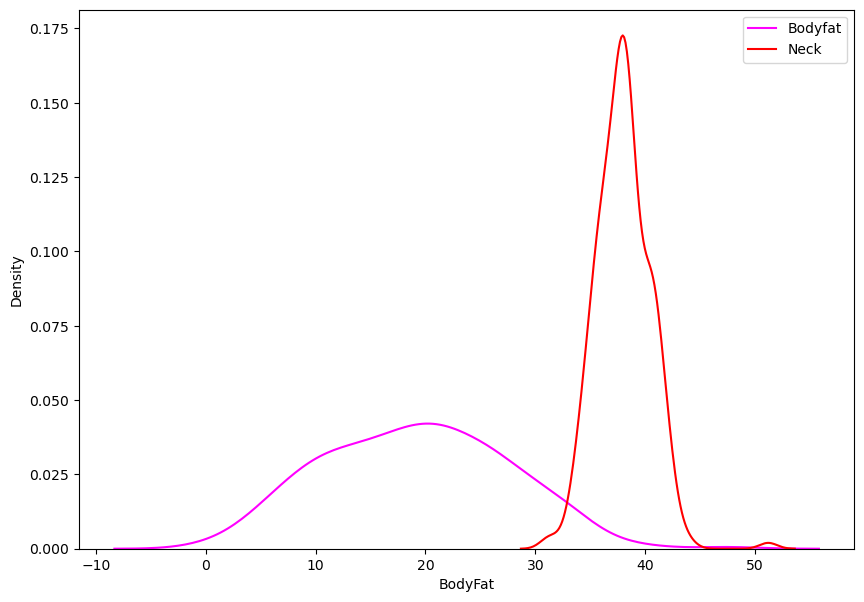

....................................................................................................
Distribution plots for Chest feature is shown below


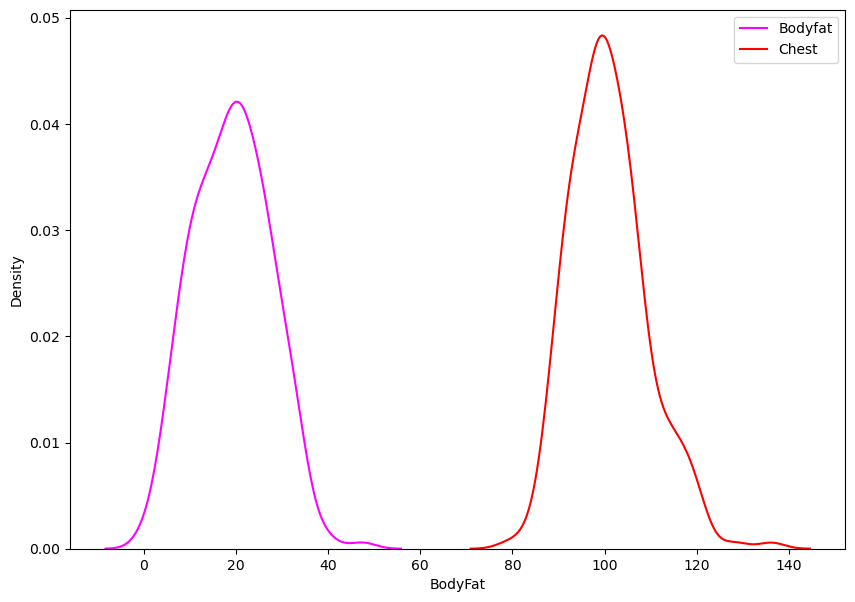

....................................................................................................
Distribution plots for Abdomen feature is shown below


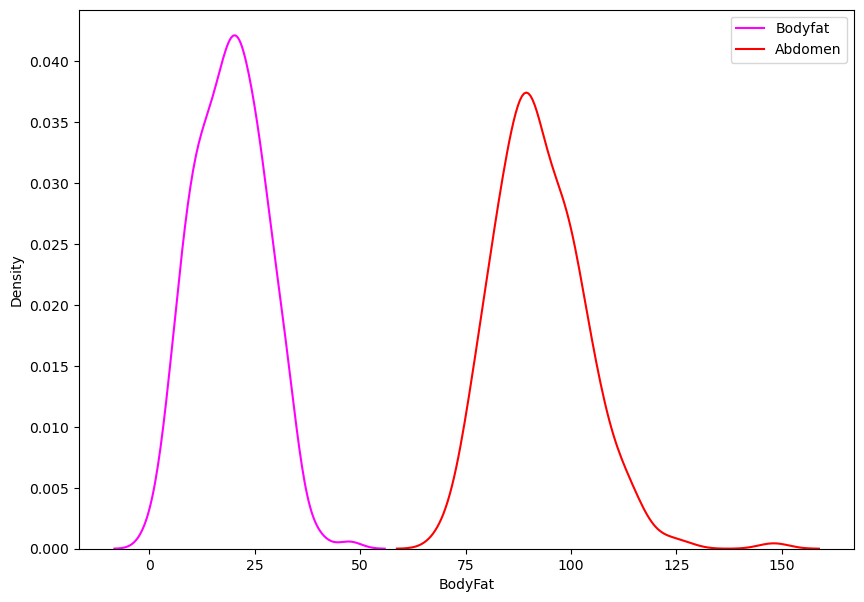

....................................................................................................
Distribution plots for Hip feature is shown below


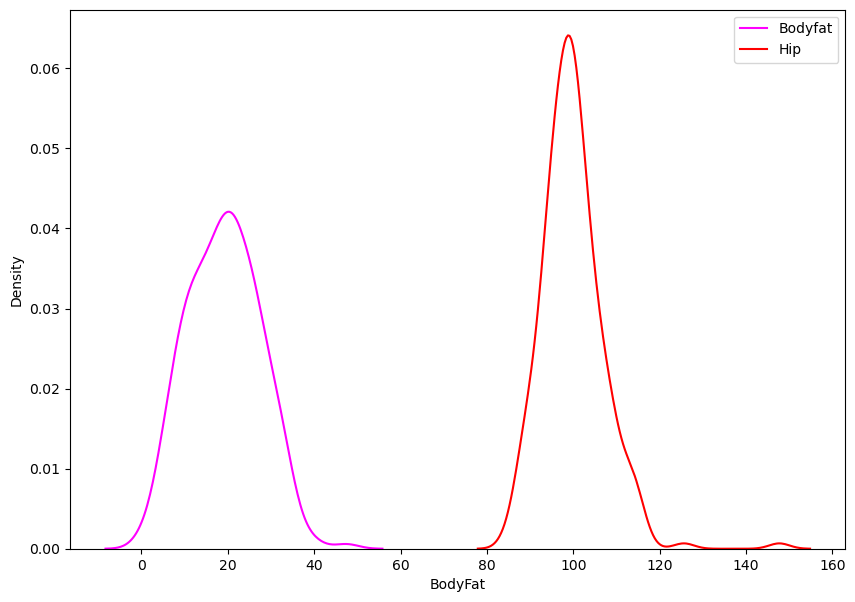

....................................................................................................
Distribution plots for Thigh feature is shown below


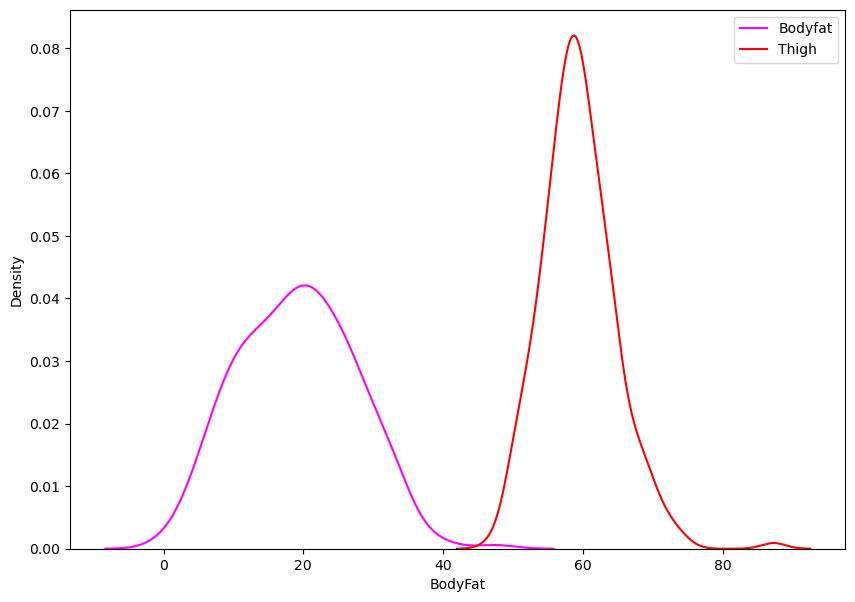

....................................................................................................
Distribution plots for Knee feature is shown below


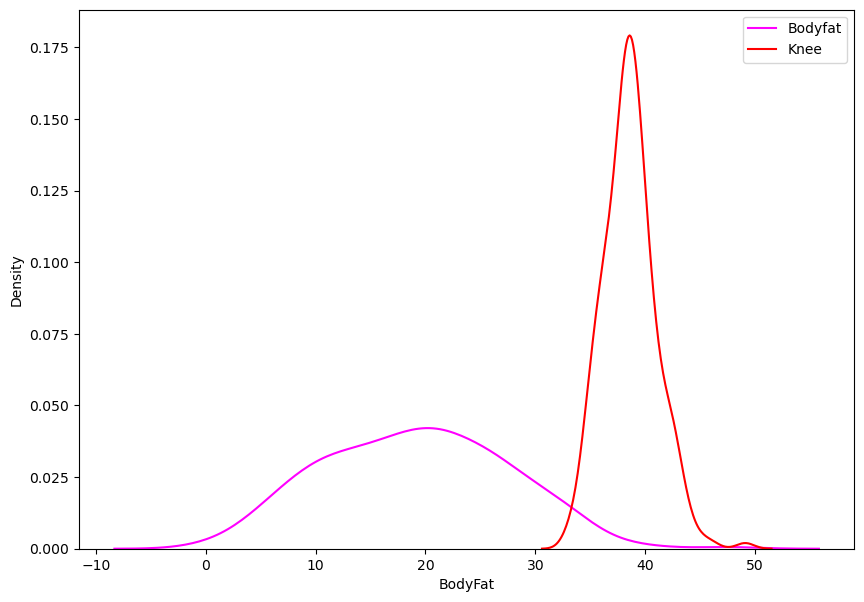

....................................................................................................
Distribution plots for Ankle feature is shown below


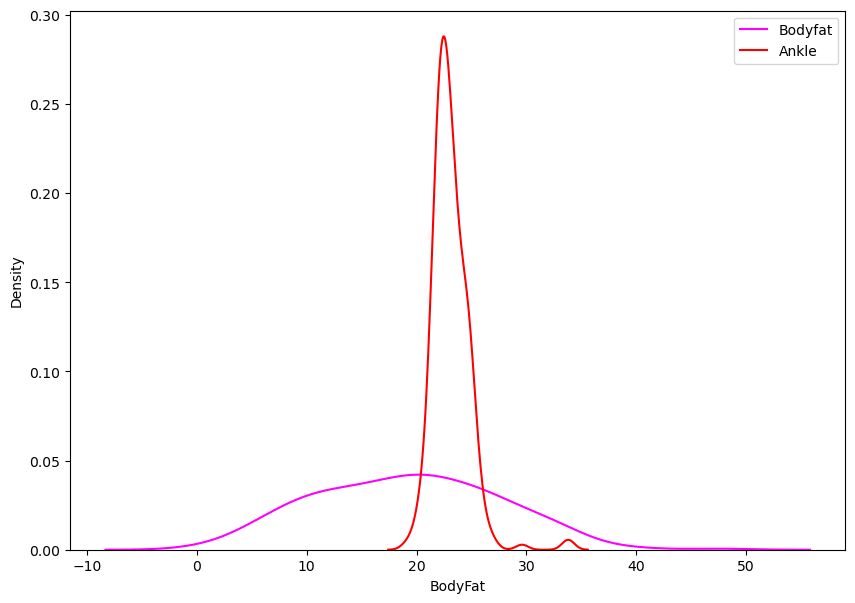

....................................................................................................
Distribution plots for Biceps feature is shown below


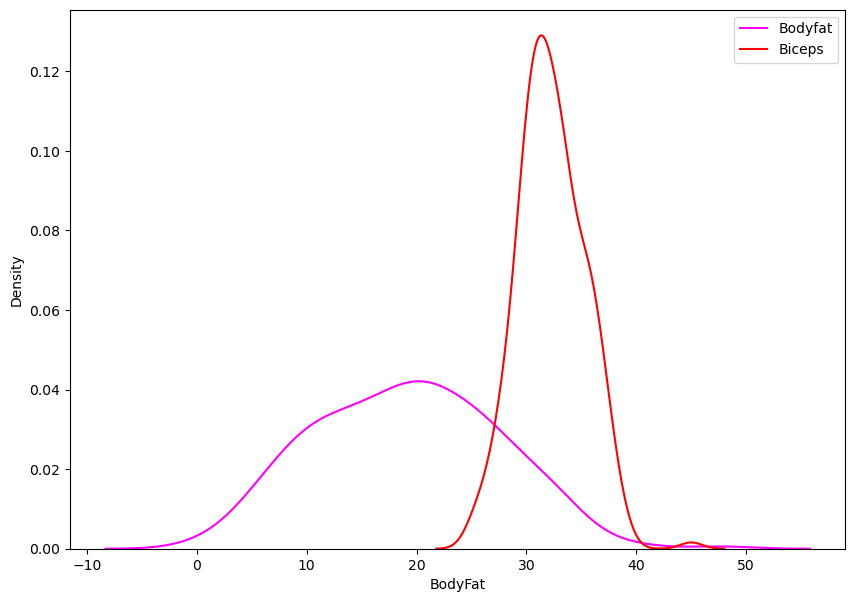

....................................................................................................
Distribution plots for Forearm feature is shown below


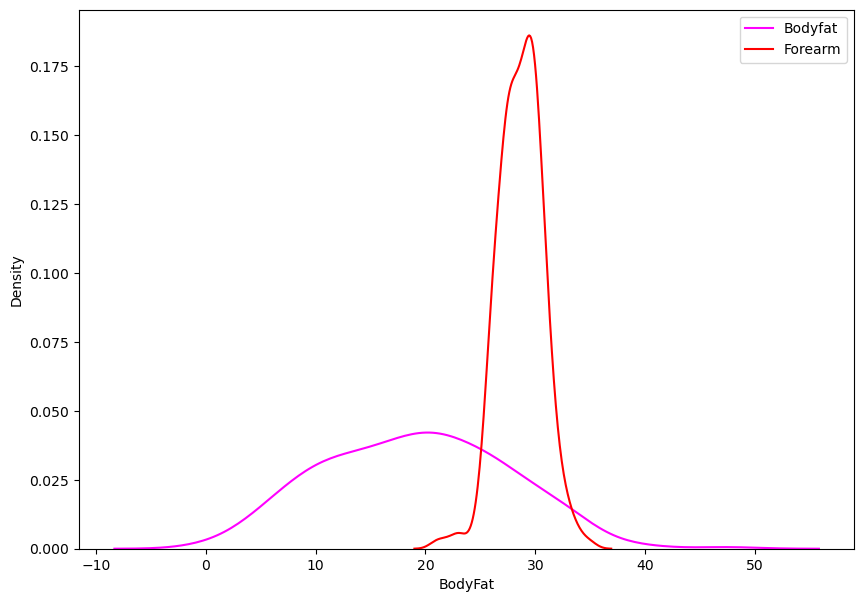

....................................................................................................
Distribution plots for Wrist feature is shown below


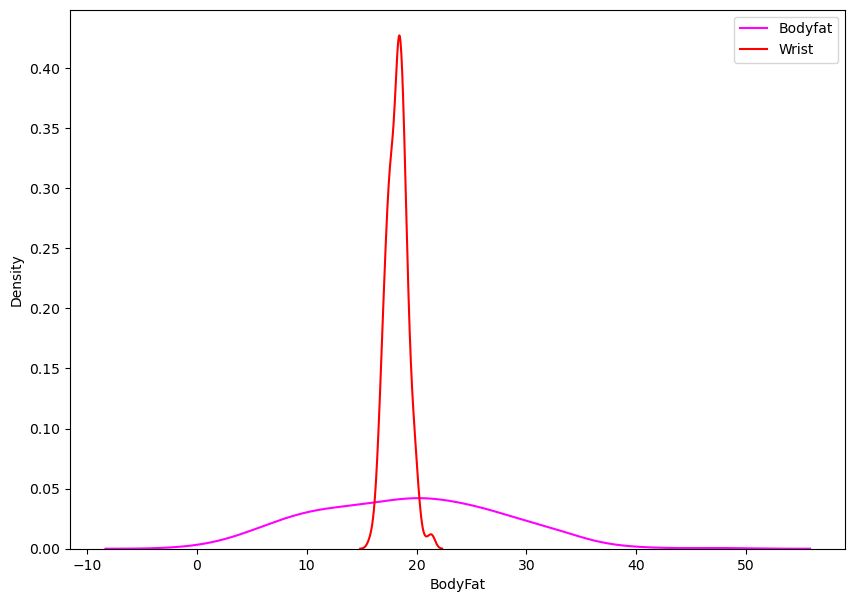

....................................................................................................


In [5]:
# define a distribution function
def plot_displots(col):
    
    plt.figure(figsize=(10, 7))
    sns.kdeplot(df["BodyFat"], color="magenta", 
                label="Bodyfat")
    sns.kdeplot(df[col], color="red", 
                label=col)
    plt.legend();
    plt.show()
    
cols =list(df.columns)
for i in cols:
    print(f"Distribution plots for {i} feature is shown below")
    plot_displots(i);
    print("."*100);

From the above plots we can see the features that have a similar Gaussian distribution as the target column which is the `BodyFat`. This distribution can help us eliminate features that may not be important in prediction the Body Fat.

### Distribution Analysis

We will visualize how the data are centralized. And use boxplot to find out outliers.

Distribution plots for the feature Density are shown below 


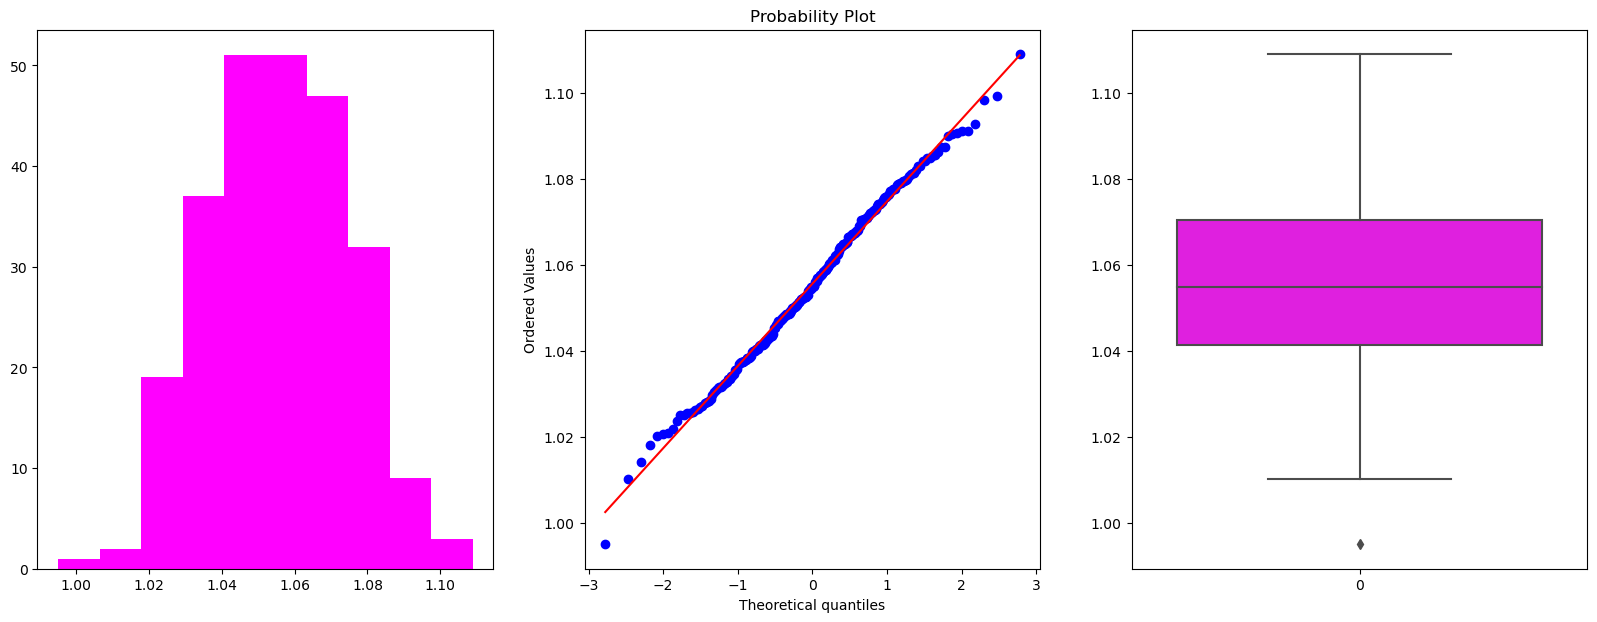

....................................................................................................
Distribution plots for the feature BodyFat are shown below 


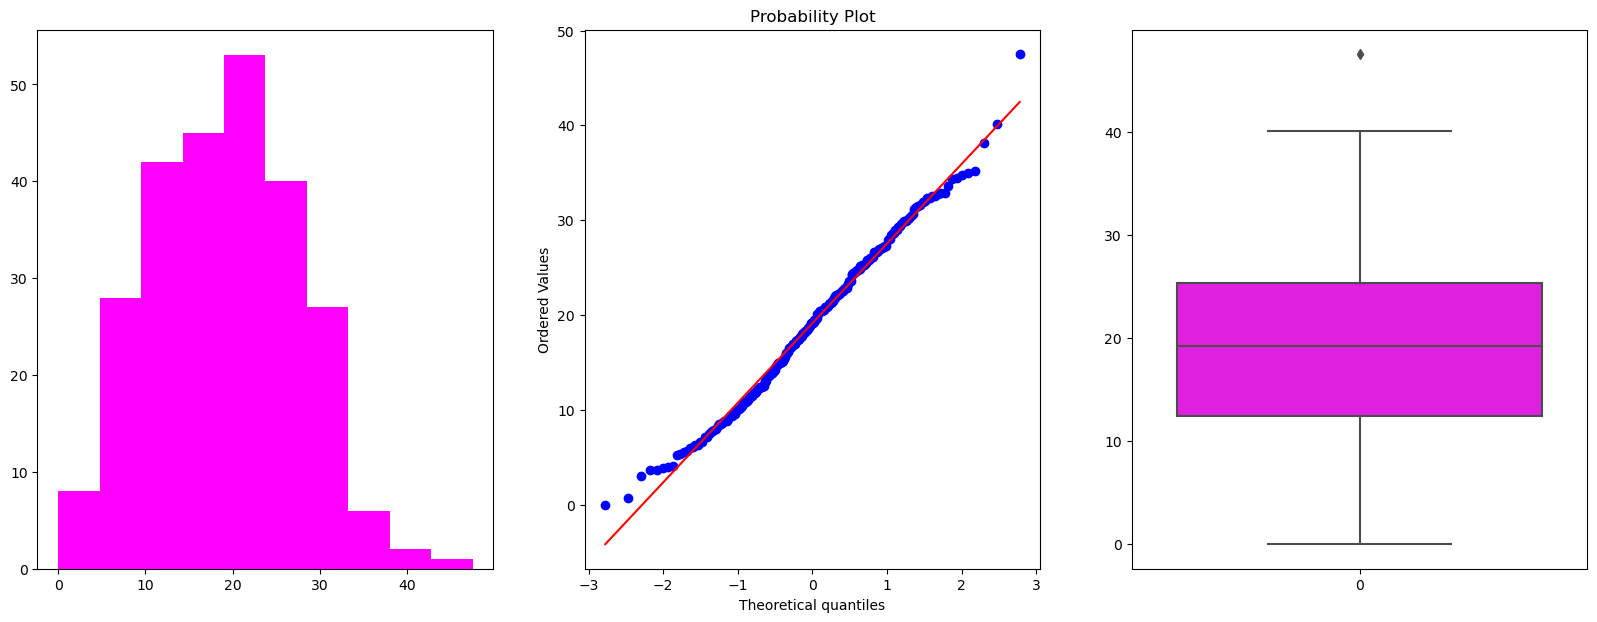

....................................................................................................
Distribution plots for the feature Age are shown below 


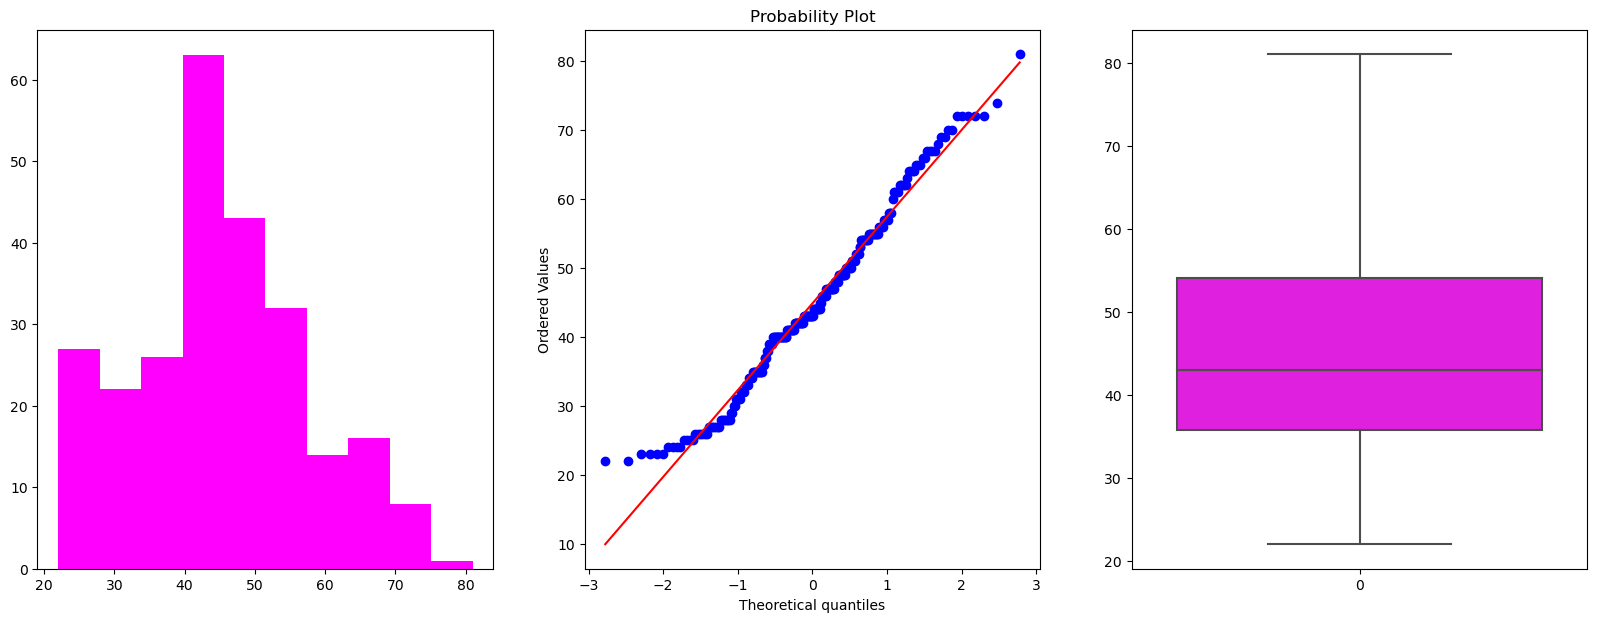

....................................................................................................
Distribution plots for the feature Weight are shown below 


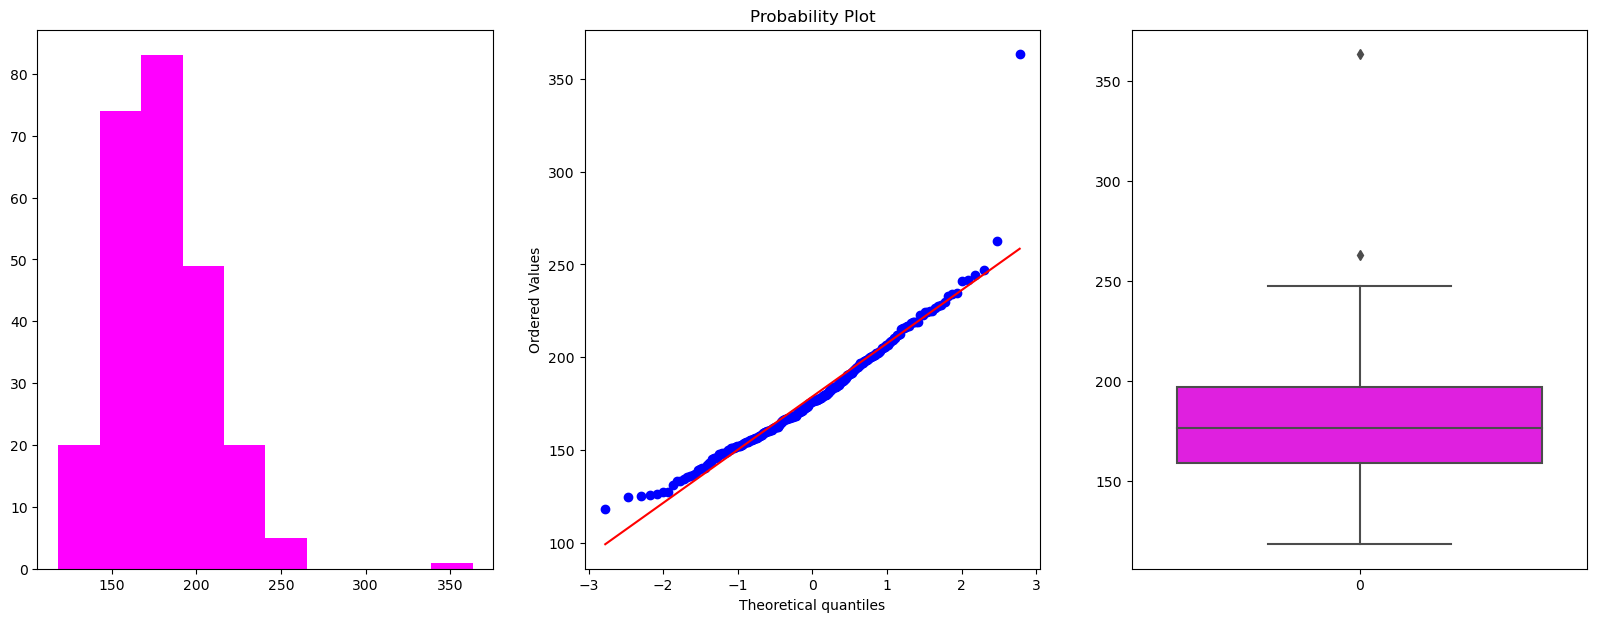

....................................................................................................
Distribution plots for the feature Height are shown below 


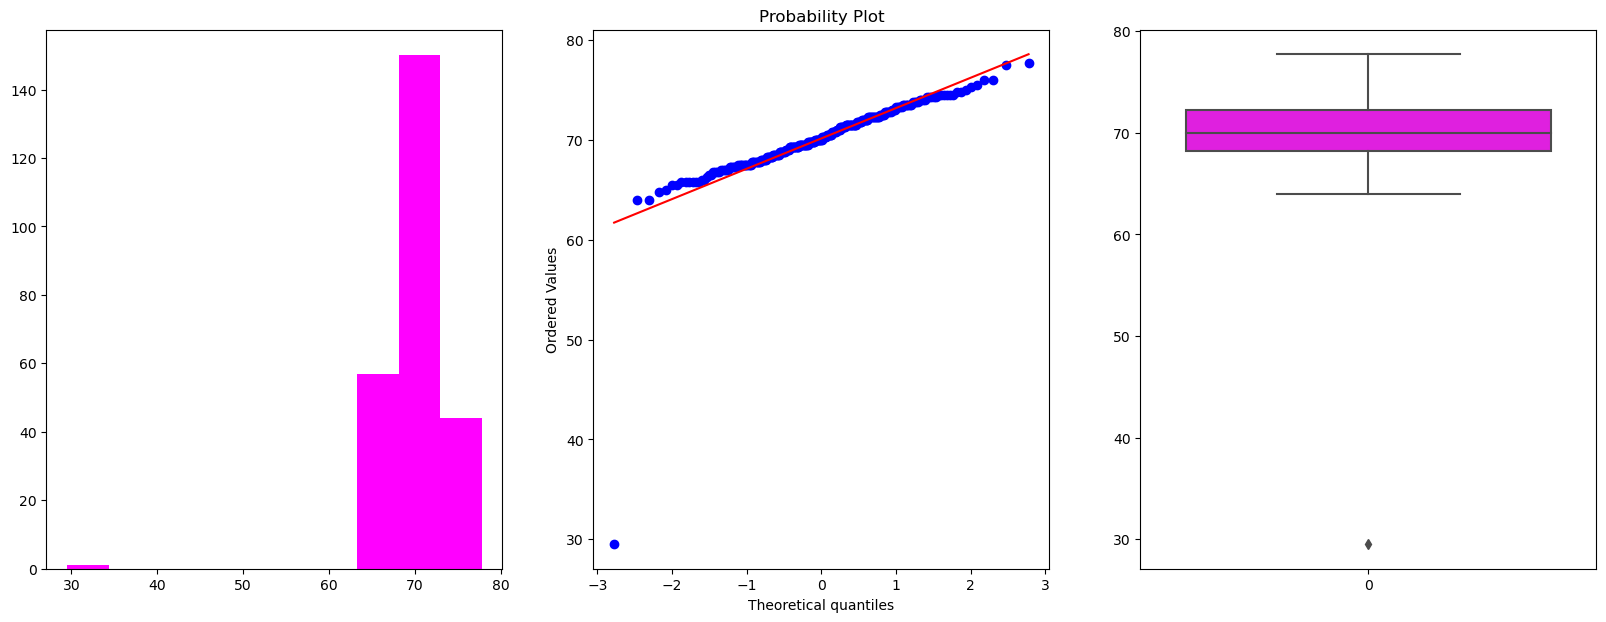

....................................................................................................
Distribution plots for the feature Neck are shown below 


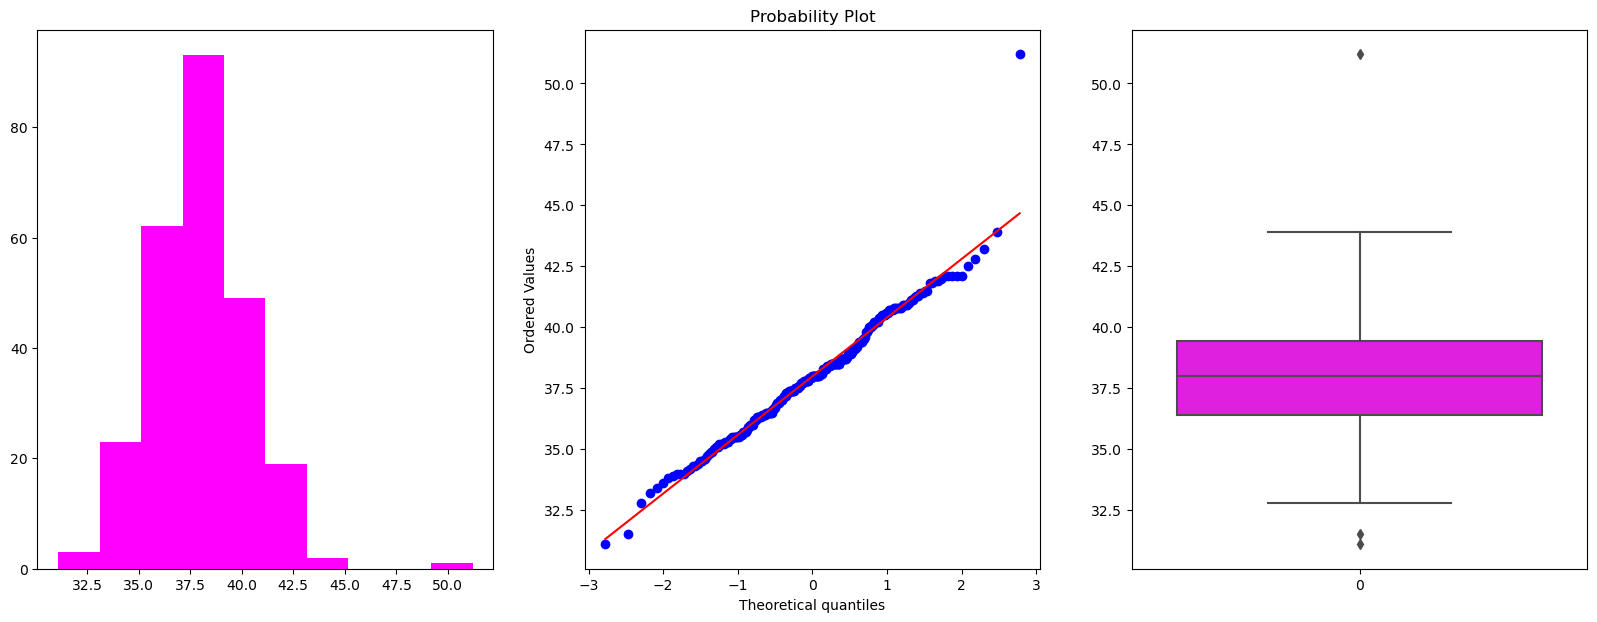

....................................................................................................
Distribution plots for the feature Chest are shown below 


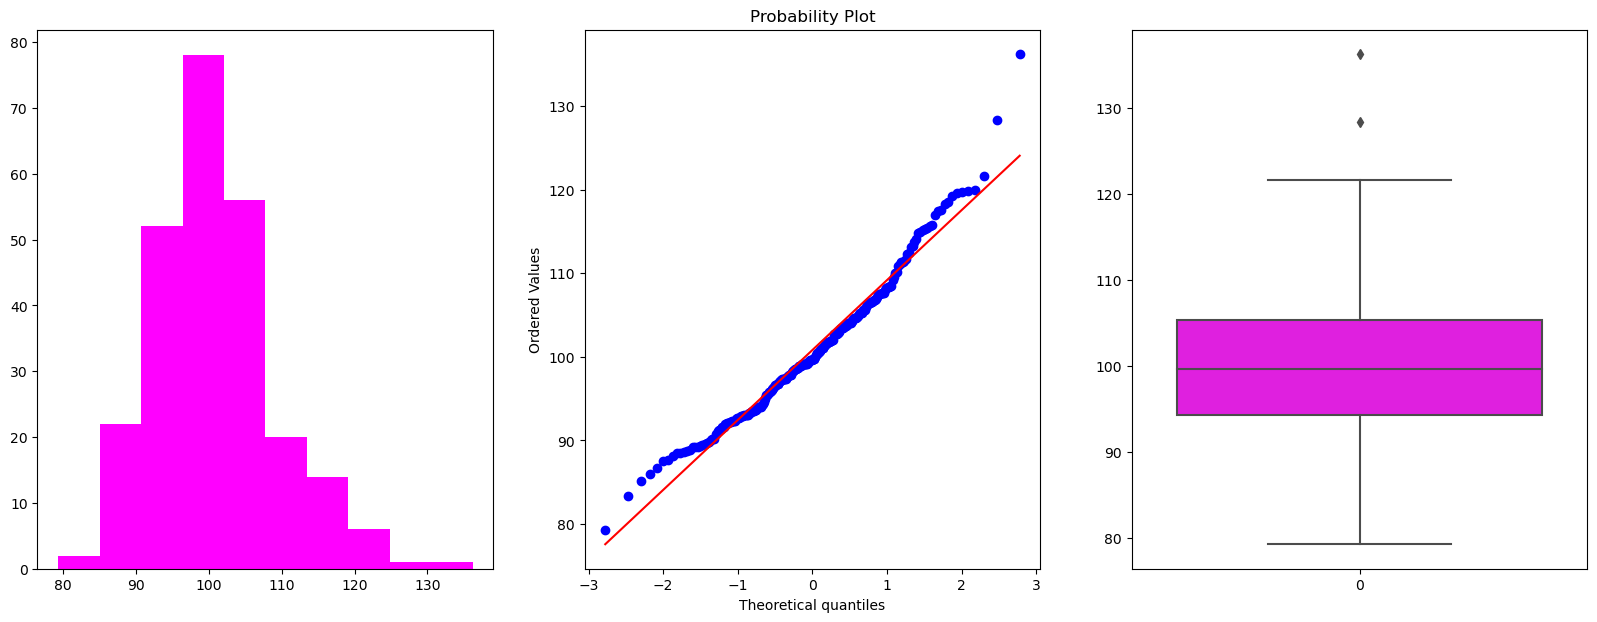

....................................................................................................
Distribution plots for the feature Abdomen are shown below 


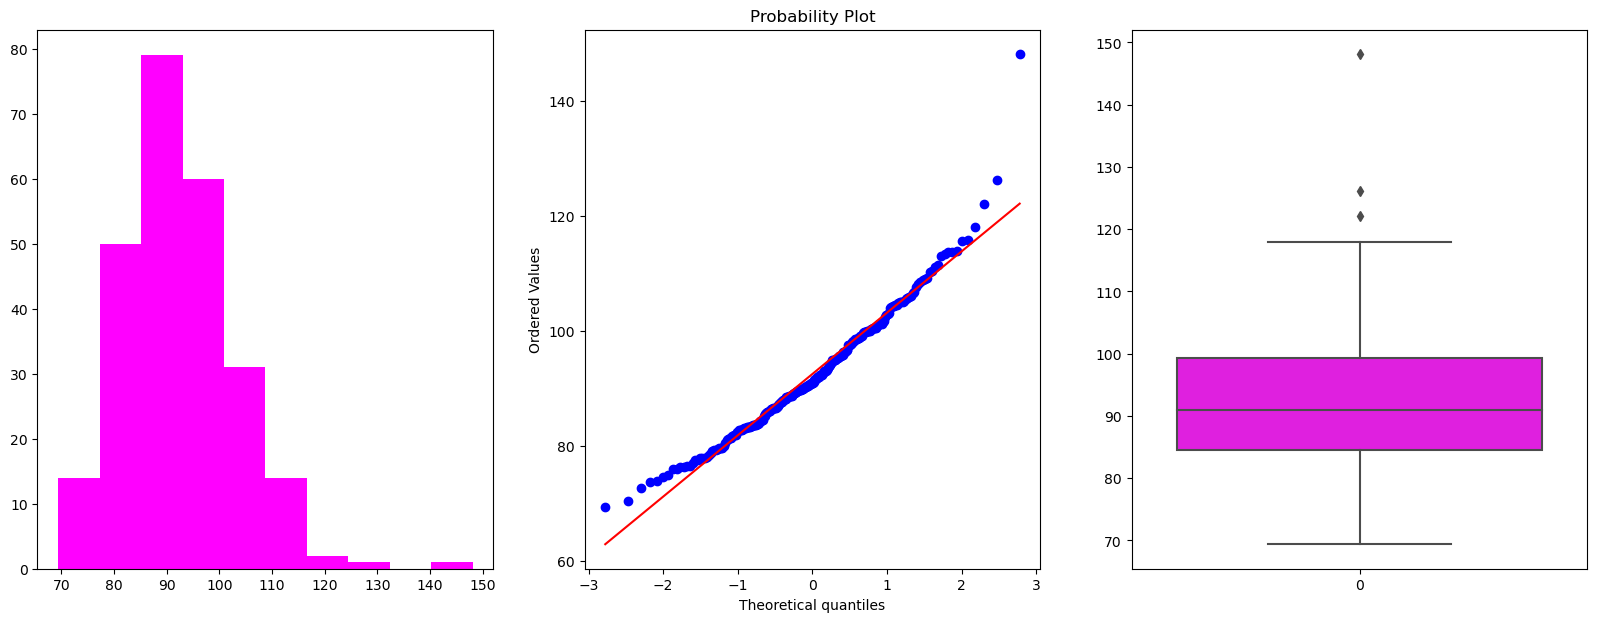

....................................................................................................
Distribution plots for the feature Hip are shown below 


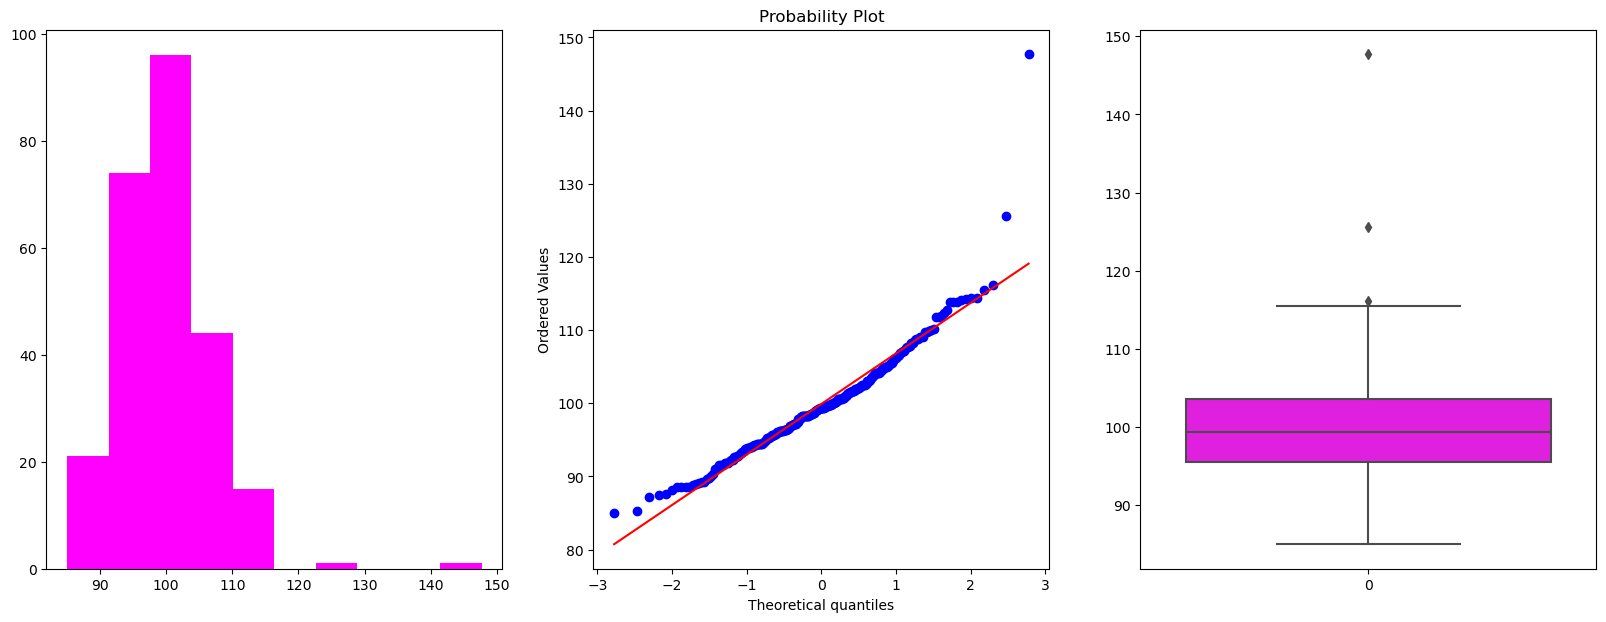

....................................................................................................
Distribution plots for the feature Thigh are shown below 


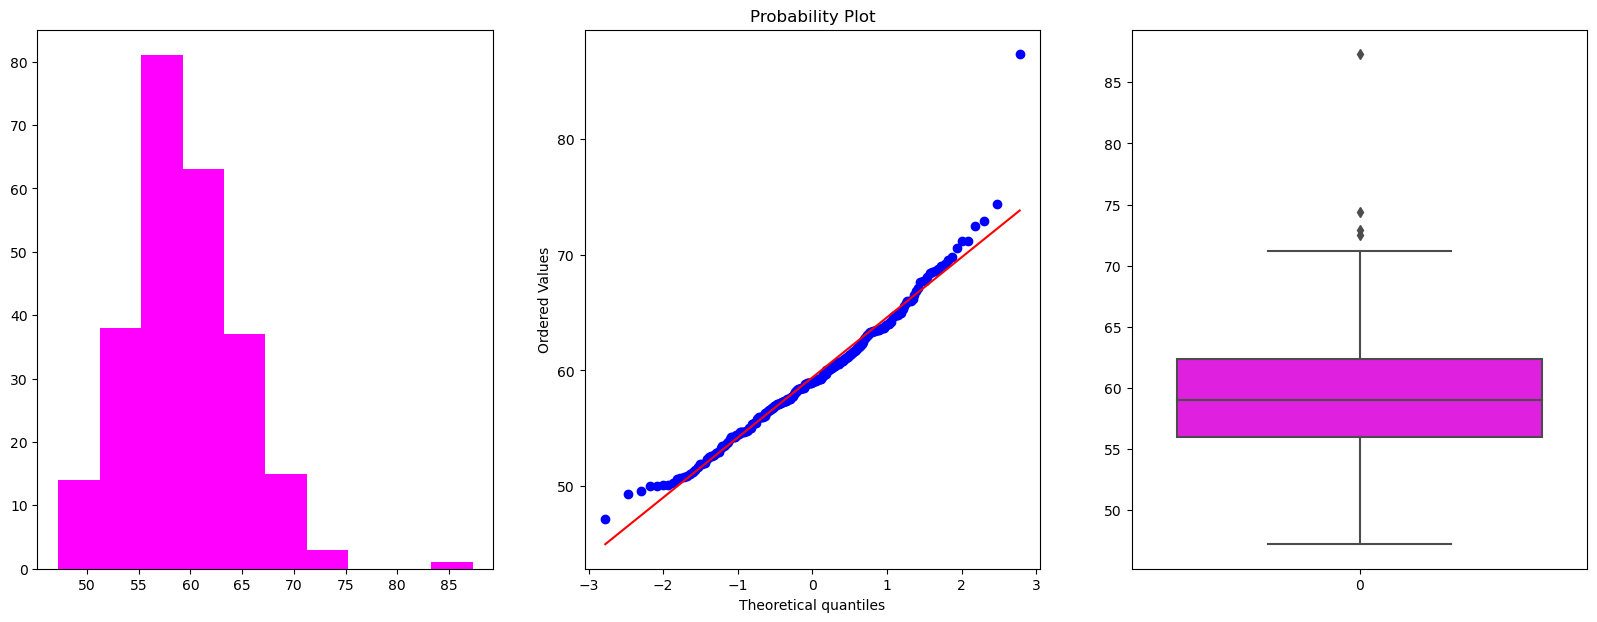

....................................................................................................
Distribution plots for the feature Knee are shown below 


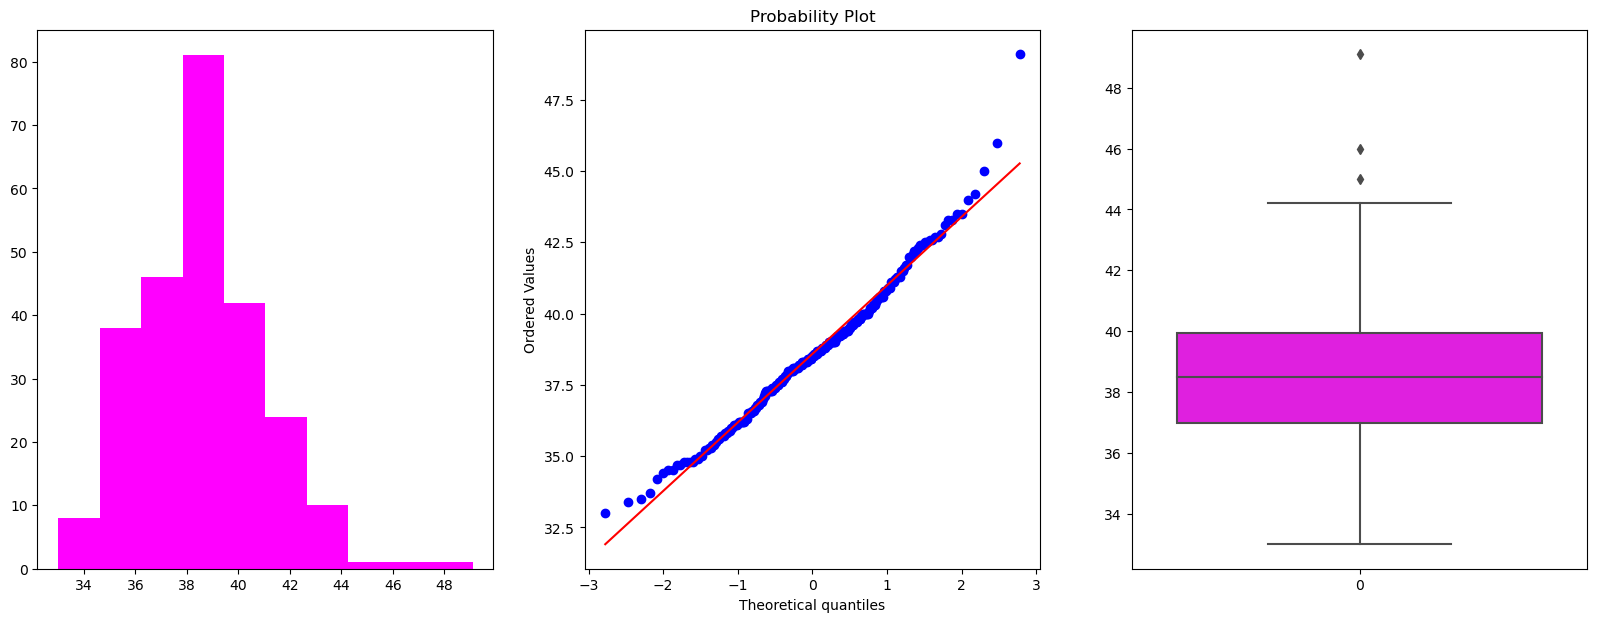

....................................................................................................
Distribution plots for the feature Ankle are shown below 


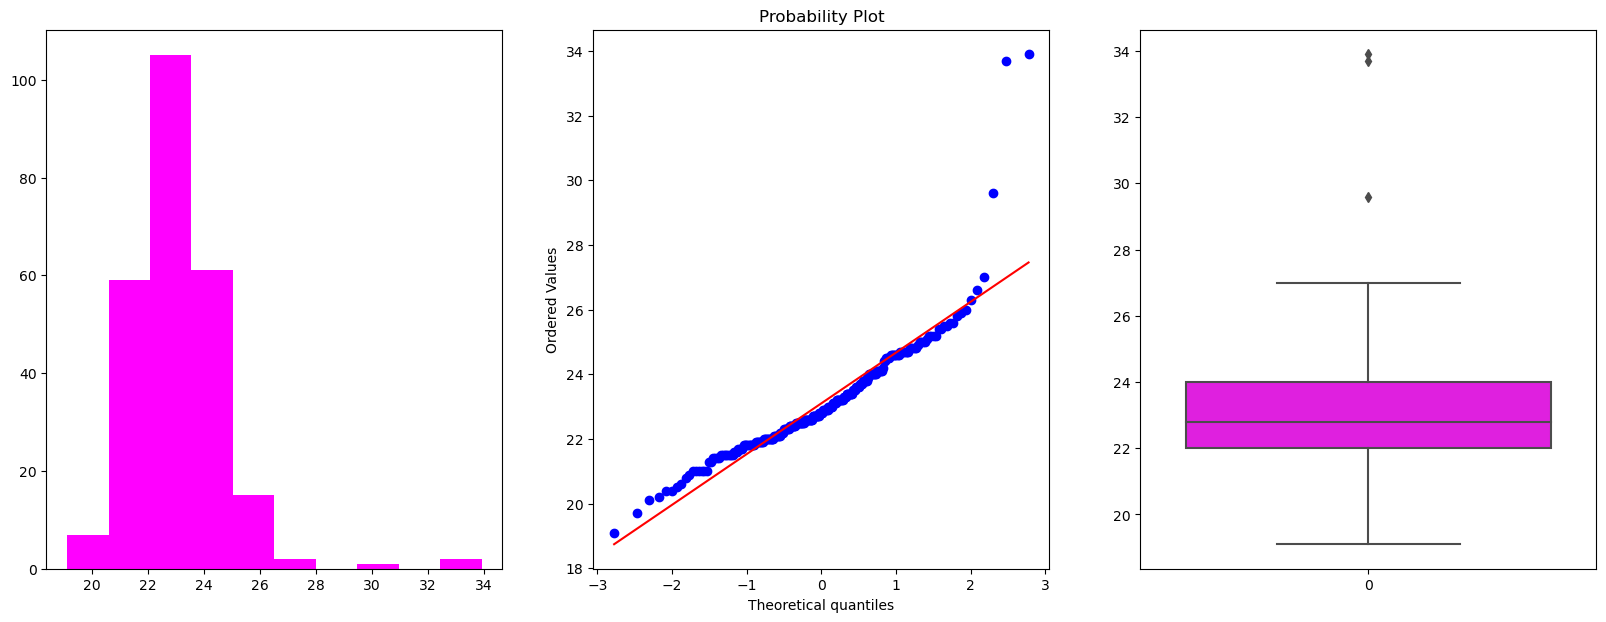

....................................................................................................
Distribution plots for the feature Biceps are shown below 


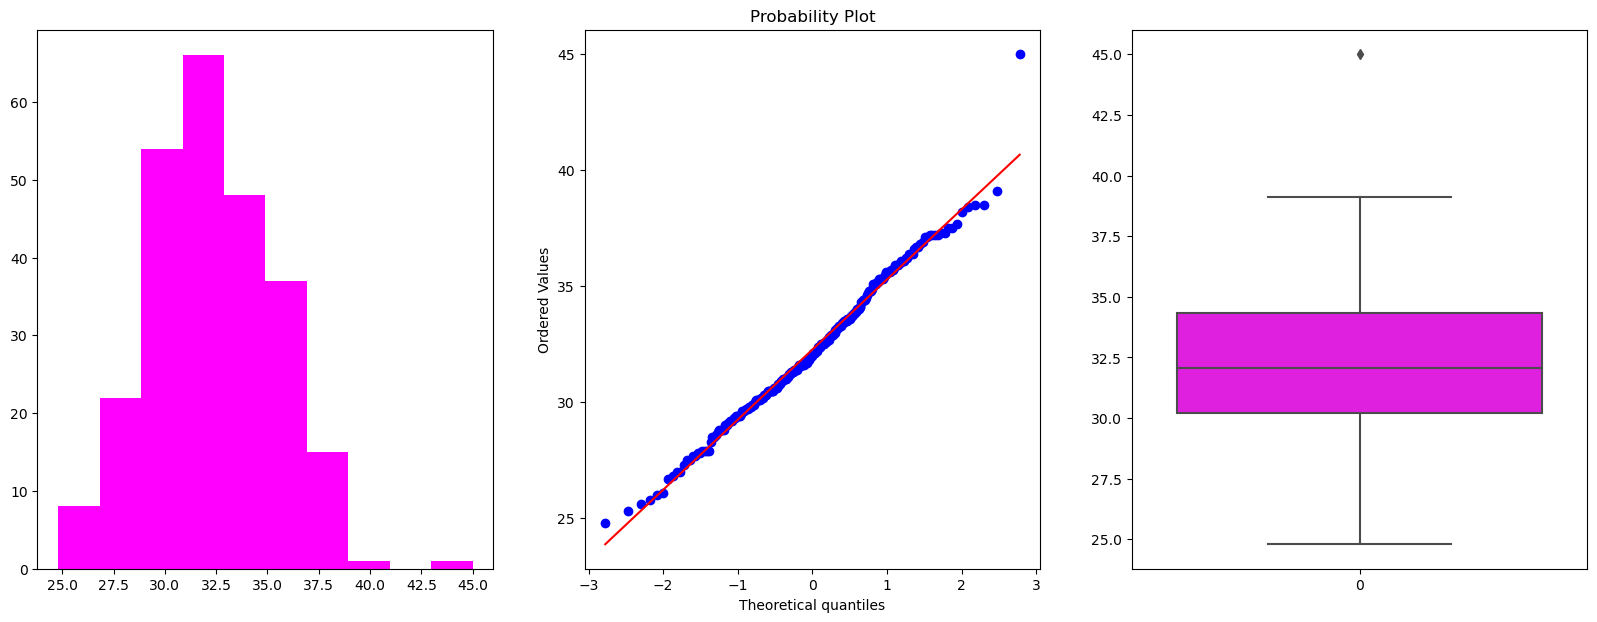

....................................................................................................
Distribution plots for the feature Forearm are shown below 


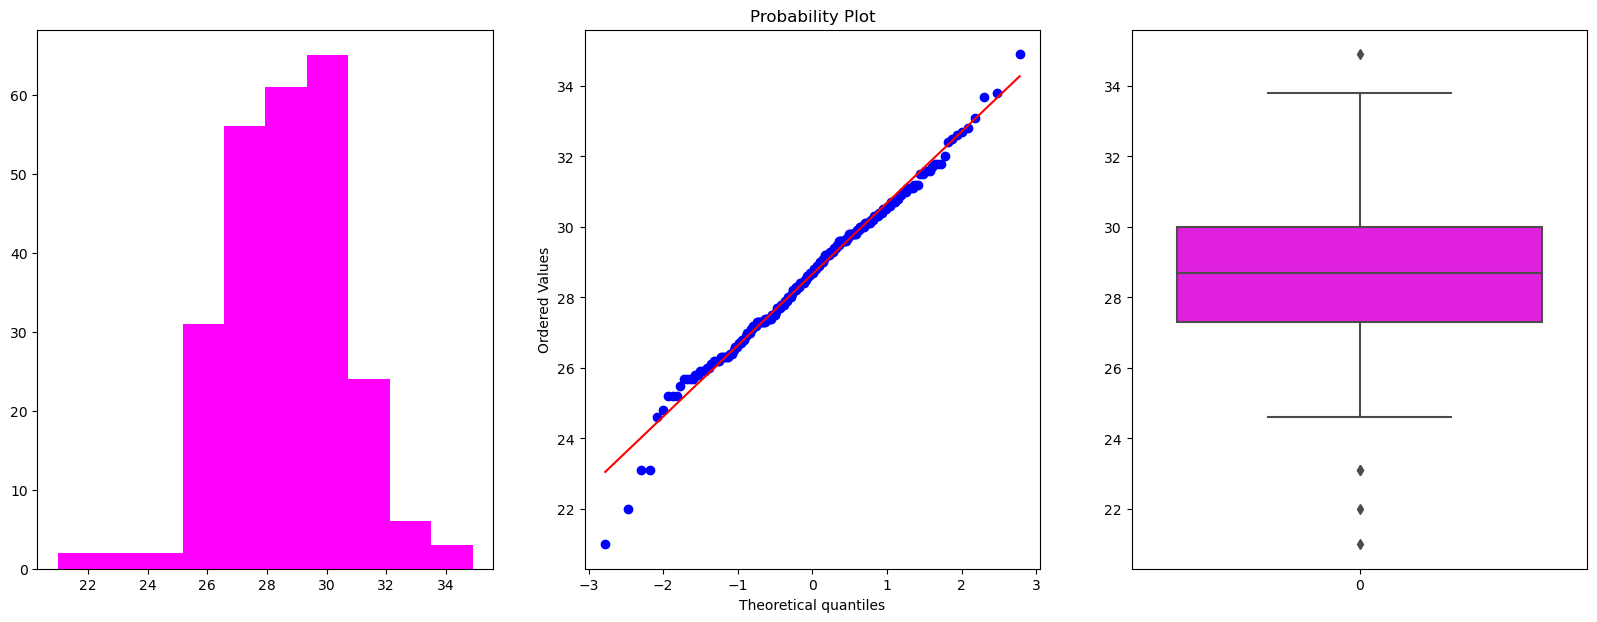

....................................................................................................
Distribution plots for the feature Wrist are shown below 


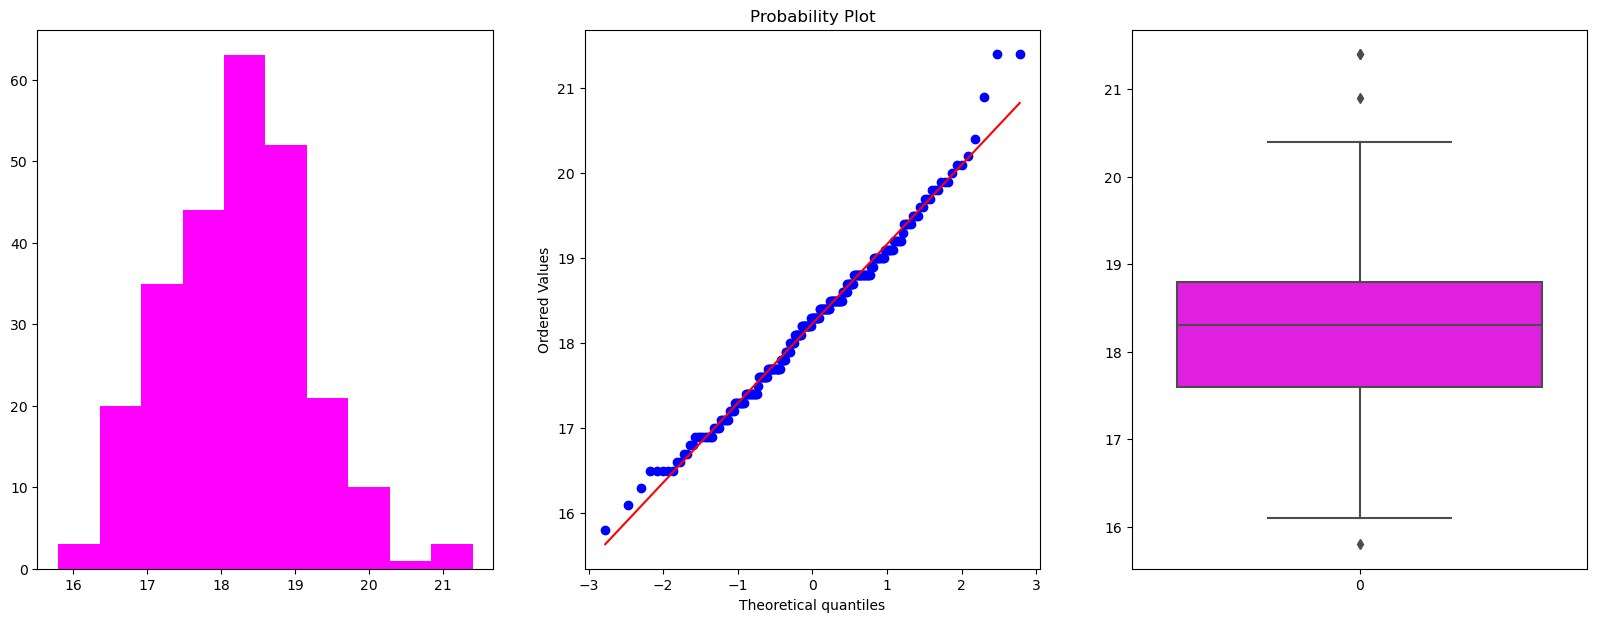

....................................................................................................


In [6]:
# function that plots the distribution
def draw_plots(df, col):
    
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color="magenta")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(df[col], color="magenta")
    
    plt.show()
    
cols = list(df.columns)
for i in range(len(cols)):
    
    print(f"Distribution plots for the feature {cols[i]} are shown below ")
    
    draw_plots(df, cols[i])
    
    print("."*100)

From the plots above, we can see that the dataset are fairly normally distributed. But from the box plot, we can observe that there are some outliers in some of the features.

### Handling outliers

In [7]:
upper_limit = []
lower_limit = []
for i in df.columns:
    upper_limit.append(df[i].mean() + (df[i].std())*4)
    lower_limit.append(df[i].mean() - (df[i].std())*4)

In [8]:
cols = list(df.columns)
j = 0
for i in range(len(cols)):
    
    temp = df.loc[(df[cols[i]]>upper_limit[j])&(df[cols[i]]<lower_limit[j])]
    j += 1

In [9]:
temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


The dataframe is empty meaning that there are no outliers.

## Feature Selection 

We will be trying various feature selection techniques to select the most relevant features in our data set.

### ExtraTrees Regressor Feature Selection

We will be using **ExtraTress Regressor** for Feature Selection

In [10]:
# We will create a copy of the data frame
data = df.copy()

# get the target label
y = data["BodyFat"]

# get the predictive varable
X = data.drop(columns=["BodyFat"])

In [11]:
# import ExtraTrees Regressor
from sklearn.ensemble import ExtraTreesRegressor

# instantiate ExtrareeRegressor
er = ExtraTreesRegressor()

# Fit the Features and target labels
er.fit(X, y)

ExtraTreesRegressor()

In [12]:
# get the feature importances into a pandas series
series = pd.Series(er.feature_importances_, index=X.columns)
series

Density    0.718346
Age        0.001498
Weight     0.008460
Height     0.003833
Neck       0.003808
Chest      0.071998
Abdomen    0.153867
Hip        0.018776
Thigh      0.004821
Knee       0.004328
Ankle      0.000922
Biceps     0.006933
Forearm    0.000570
Wrist      0.001841
dtype: float64

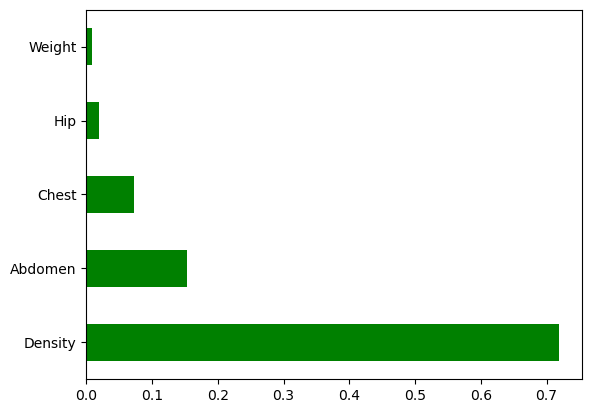

In [13]:
# plot a graph of the top 5 feature importance scores
series.nlargest(5).plot(kind="barh", color="green");

### Mutual Information Gain for Feature Selection

We will be using this technique to select features.

In [14]:
# import mutual info regression
from sklearn.feature_selection import mutual_info_regression

# instanciate mutual_info_regression
mr = mutual_info_regression(X, y)

<AxesSubplot: >

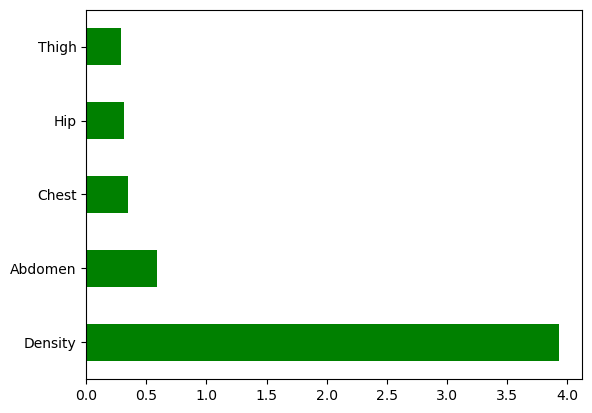

In [15]:
plot_data = pd.Series(mr, index=X.columns)
plot_data.nlargest(5).plot(kind="barh", color="green")

### Removing Correlation

In [16]:
#
data 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


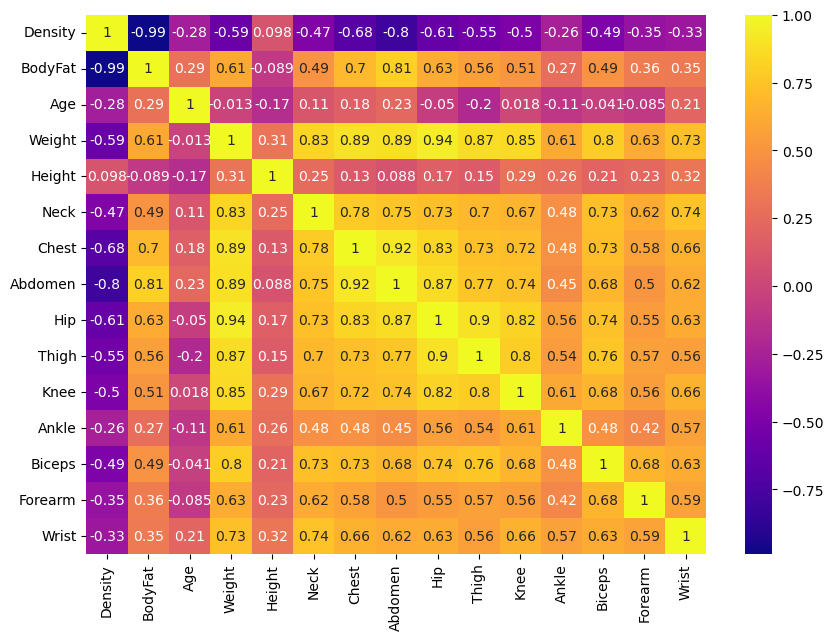

In [17]:
# Plot correlation map
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="plasma");

From the correlation map above, we can see that there so many features which are correlated to one another.

We will write a function that removes highly correlated features by a given threshold.

In [18]:
# defin a correlation threshold function function 
def correlation(df, threshold):
    
    col_cor = set()
    
    cor_mat = df.corr()
    
    for i in range(len(cor_mat)):
        
         for j in range(i):
                
                '''
                for each cell, get the value of that cell by 
                .loc[i][j], where i is th row and j is the col. 
                If the absolute value is greater that the threshold, 
                get the colum_name and add it in the set
                '''
                
                if abs(cor_mat.iloc[i][j]) > threshold:
                    col_name = cor_mat.columns[i]
                    col_cor.add(col_name)
                    
    return col_cor

ans = correlation(X, threshold=0.85)  

ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

In [19]:
X.corr()[['Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh']]

,Abdomen,Chest,Hip,Knee,Thigh
Density,-0.798955,-0.682599,-0.609331,-0.495040,-0.553091
Age,0.230409,0.176450,-0.050332,0.017516,-0.200096
Weight,0.887995,0.894191,0.940884,0.853167,0.868694
Height,0.087813,0.134892,0.170394,0.286053,0.148436
Neck,0.754077,0.784835,0.734958,0.672405,0.695697
Chest,0.915828,1.000000,0.829420,0.719496,0.729859
Abdomen,1.000000,0.915828,0.874066,0.737179,0.766624
Hip,0.874066,0.829420,1.000000,0.823473,0.896410
Thigh,0.766624,0.729859,0.896410,0.799170,1.000000
Knee,0.737179,0.719496,0.823473,1.000000,0.799170


From the above feature selection techniques we can say that the features recommended by the `ExtraTreesRegressor` and the `mutual_information_gain` are correct and from the correlation map we get to observe a similar patter.

We noticed that `Abdomen` and `Hip` are having similar features, they are having collinearity, same goes with `knee` and `thighs`and so on. We can either keep any one of them. We also noticed that the feature `Abdomen` gave more feature importance score in comparison to `Hip`, so `Abdomen` will be selected.

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**We will calculate the Variance inflation factor of each feature**

Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables.

In [32]:
# copy data
temp = data[list(data.columns)]
info = pd.DataFrame()

# Get varianve importance score
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])] 
info["Columns"] = temp.columns
info

,VIF,Columns
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [36]:
info.sort_values(by="VIF", ascending=False)

,VIF,Columns
0,3695.622377,Density
8,2933.636131,Hip
6,1374.457425,Chest
14,1349.973920,Wrist
7,1332.624257,Abdomen
3,1238.097164,Weight
10,1187.890413,Knee
5,1081.965633,Neck
9,1017.257501,Thigh
4,613.410514,Height


Let's view the names of the columns gotten by the ExtraTrees Regressor and Mutual Information Gain

In [41]:
col_1 = list(series.nlargest(5).index)
col_2 = list(plot_data.nlargest(5).index)

col_1, col_2

(['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Thigh'])

We will go with the `Hip` and `Weight` because `Hip` and `Thigh` are very related based om the human anatomy structure. Therefore we will select col_1 features and drop every other feature that does not produce any further importance. We will try out some other features.

In [42]:
to_train = X[col_1]
to_train.head()

,Density,Abdomen,Chest,Hip,Weight
0,1.0708,85.2,93.1,94.5,154.25
1,1.0853,83.0,93.6,98.7,173.25
2,1.0414,87.9,95.8,99.2,154.00
3,1.0751,86.4,101.8,101.2,184.75
4,1.0340,100.0,97.3,101.9,184.25
